#Data Visualization Using Matplotlib

###Demo 3: Customizing and Saving Subplots

In this demo, you will visualize data in subplots and grids.

<h3><ul><li>Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<h3><ul><li>Reading Dataset

In [ ]:
stats=pd.read_csv('top50.csv')
stats.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 1. Barplot

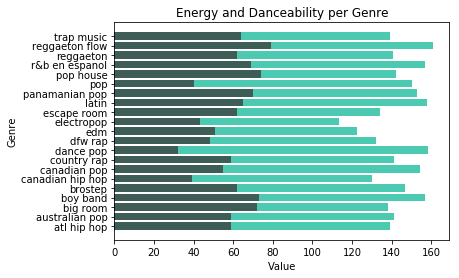

In [ ]:
#Matplotlib also supports hex colors
for group,data in stats.groupby('Genre'):
    plt.barh(group,data['Energy'].mean(),color='#3E5D57') 
    plt.barh(group,data.Danceability.mean(),color='#4CCAB1',left=data['Energy'])
plt.xlabel('Value')
plt.ylabel('Genre')
plt.title('Energy and Danceability per Genre')
plt.show()

### 2. Subplots

In [ ]:
# total number of columns persent in dataset
len(stats.columns)

13

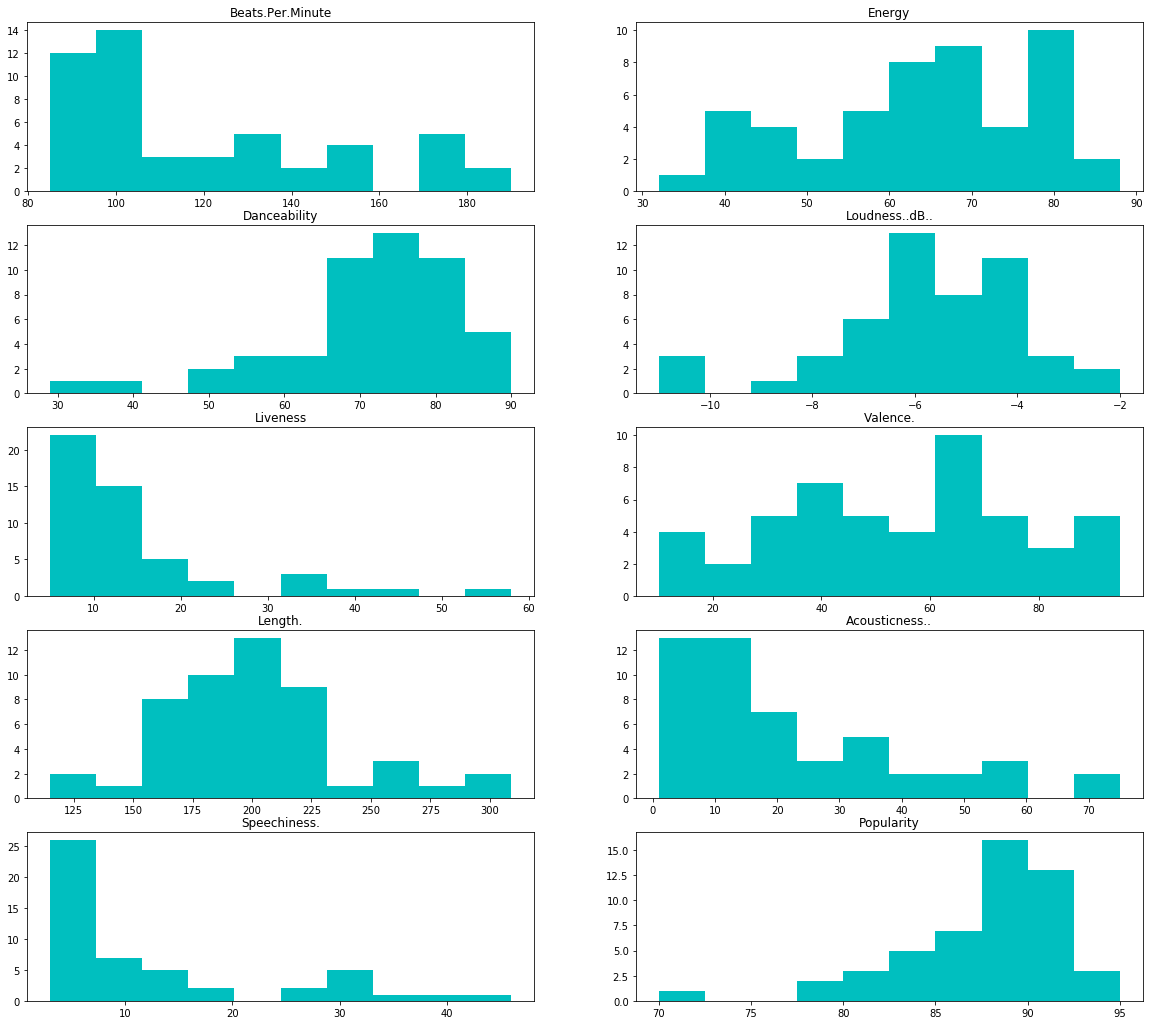

In [ ]:
#First 3 columns are caegorical we don't need those
indx=1 #Index for subplots starts from 1
plt.figure(figsize=(20,18))
for col in stats.columns[3:]:
    plt.subplot(5,2,indx)
    plt.hist(stats[col],color='c')
    plt.title(col)
    indx+=1
plt.show()

### 3. Boxplot

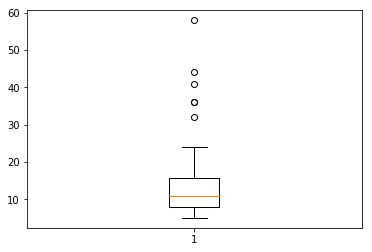

In [ ]:
plt.boxplot(stats.Liveness)
plt.show()

### 4. GridSpec

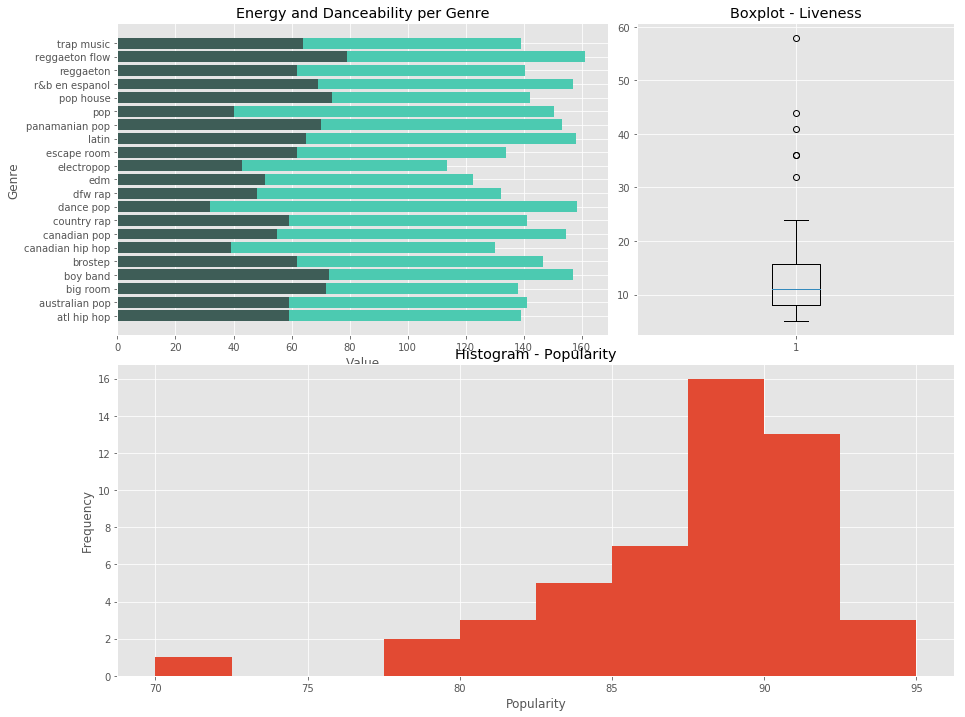

In [ ]:
plt.style.use('ggplot')
stats_grid=plt.GridSpec(4,5)
stats_fig=plt.figure(figsize=(15,12))
stats_fig.add_subplot(stats_grid[:2,:3])  # row: 1,2 and column: 1,2
# Using custom colors
for group,data in stats.groupby('Genre'):
    plt.barh(group,data['Energy'].mean(),color='#3E5D57') 
    plt.barh(group,data.Danceability.mean(),color='#4CCAB1',left=data['Energy'])
plt.xlabel('Value')
plt.ylabel('Genre')
plt.title('Energy and Danceability per Genre')


stats_fig.add_subplot(stats_grid[:2,3:]) # row:1,2 and col: 3,4,5 
#Some sytles do not display outliers
plt.title('Boxplot - Liveness')
plt.boxplot(stats.Liveness)

stats_fig.add_subplot(stats_grid[2:,:]) # row:3,4 and col:1-5
plt.title('Histogram - Popularity')
plt.hist(stats.Popularity)
plt.ylabel('Frequency')
plt.xlabel('Popularity')
plt.savefig('GridSpec.png')
plt.show()

##### Conclusion: This code demonstrates how to use subplots and gridspec in matplotlib.